### Assignment 3

In [42]:
import numpy as np
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

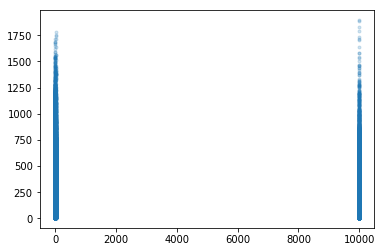

In [75]:
#Data doesn't make sense
data = np.load('omni_1min_2014.npy')
plt.plot( data['bz'], data['ae_index'], '.', alpha=0.2 )
plt.show()

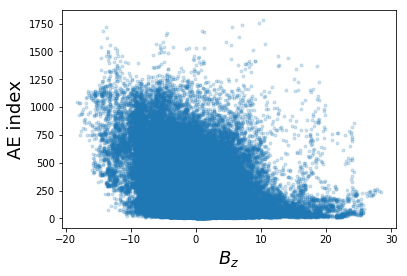

In [76]:
#Certain values are 9999, corresponds to missing value
goodvalues = data['bz'] <= 9000
dat = data[goodvalues]

plt.plot( dat['bz'], dat['ae_index'], '.', alpha=0.2 )
plt.xlabel('$B_z$',fontsize=18)
plt.ylabel('AE index',fontsize=18)
plt.show()

Use tools in scipy.optimize (or elsewhere) to fit a linear model with a single variable 

 $$ AE = c_1 B_z $$

by finding the value of $c_1$ which minimizes the goodness of fit given by 

 $$ \chi^2 = \sum (\mathrm{model} - \mathrm{data})^2 $$

then try two variables

 $$ AE = c_1 B_z + c_2 v_x $$
 
then try a non-linear transformation of a single variable
 
 $$ AE = c_1 B_z + c_2 v_x^2 $$ 
 
then try cross terms 

 $$ AE = c_1 B_z + c_2 v_x + c_3 B_z v_x $$ 
 
then explore combinations and transformations of variables to obtain "the best" model.  Think about what that means.

-2.21 14.7


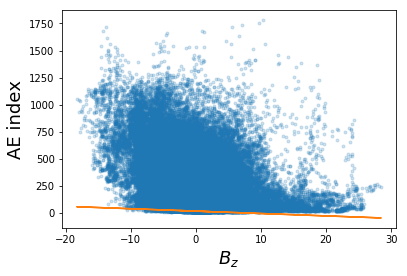

In [113]:
def linfit(c):
    
    return c[0]*dat['bz']+c[1]

fun = lambda c: np.sum( ( dat['ae_index']-linfit(c) )**2 )/len(dat)


opt = scipy.optimize.minimize(fun,[-1.2,14.7])
c1, c2 = opt['x']
print(c1,c2)

plt.plot( dat['bz'], dat['ae_index'], '.', alpha=0.2 )
plt.plot( dat['bz'], linfit([c1,c2]))

plt.xlabel('$B_z$',fontsize=18)
plt.ylabel('AE index',fontsize=18)
plt.show()

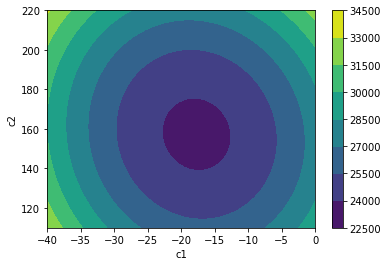

In [114]:
c1 = np.linspace(-40,0,50)
c2 = np.linspace(110,220,50)

chi2 = np.zeros((len(c1),len(c2)))    


for j in range(len(c1)):
    for k in range(len(c2)):
        
        chi2[j][k] = fun([c1[j],c2[k]])
        
plt.contourf(c1,c2,chi2.T)
plt.colorbar()
plt.xlabel('c1')
plt.ylabel('c2')

plt.show()